In [ ]:
#visualization
import numpy as np
import pandas as pd
import seaborn as sns
import random
import plotly.graph_objects as go
import plotly.express as px
import scipy.stats as stt
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%pylab inline
from sklearn.preprocessing import StandardScaler

!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip

!pip install pyproj==1.9.6

from mpl_toolkits.basemap import Basemap

from IPython.display import clear_output
clear_output()

In [ ]:
data = pd.read_csv('/content/standardized_data.xls')
data.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,rank,year,Positive affect,Negative affect
0,Afghanistan,NaN,3.724,NaN,NaN,NaN,0.146619,0.230990,0.412946,0.632737,0.486931,0.893460,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105,2008,0.518,0.258
1,Afghanistan,NaN,4.402,NaN,NaN,NaN,0.180531,0.375897,0.421875,0.579092,0.508228,0.859705,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96,2009,0.584,0.237
2,Afghanistan,NaN,4.758,NaN,NaN,NaN,0.201875,0.357245,0.430804,0.470426,0.441433,0.708861,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84,2010,0.618,0.275
3,Afghanistan,NaN,3.832,NaN,NaN,NaN,0.196489,0.331420,0.437946,0.327373,0.481123,0.734177,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,140,2011,0.611,0.267
4,Afghanistan,NaN,3.783,NaN,NaN,NaN,0.213445,0.331420,0.445089,0.375516,0.552759,0.781646,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,136,2012,0.710,0.268


In [ ]:
#drop the countries which has missing data from 2015 to 2021, and save them into base 

base = data[data['year'] == 2021]
print(base['Country name'])

for year in range(2015,2020):
  data_y = data[data['year'] == year]
  base = base.merge(data_y, how='inner', on='Country name')
  print(base['Country name'])

print(base['Country name'])


12      Afghanistan
26          Albania
35          Algeria
55        Argentina
70          Armenia
           ...     
2038      Venezuela
2053        Vietnam
2066          Yemen
2081         Zambia
2097       Zimbabwe
Name: Country name, Length: 149, dtype: object
0      Afghanistan
1          Albania
2        Argentina
3          Armenia
4        Australia
          ...     
132      Venezuela
133        Vietnam
134          Yemen
135         Zambia
136       Zimbabwe
Name: Country name, Length: 137, dtype: object
0      Afghanistan
1          Albania
2        Argentina
3          Armenia
4        Australia
          ...     
129      Venezuela
130        Vietnam
131          Yemen
132         Zambia
133       Zimbabwe
Name: Country name, Length: 134, dtype: object
0      Afghanistan
1          Albania
2        Argentina
3          Armenia
4        Australia
          ...     
128      Venezuela
129        Vietnam
130          Yemen
131         Zambia
132       Zimbabwe
Name: Countr

In [ ]:
predata = data
predata['match'] = predata['Country name'].isin(base['Country name']) # if matches it returns True else False
newdata = predata[predata['match'] == True]
newdata = newdata[['Country name', 'Ladder score','year']]

In [ ]:
data.columns

Index(['Country name', 'Regional indicator', 'Ladder score',
       'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual', 'rank', 'year', 'Positive affect',
       'Negative affect'],
      dtype='object')

In [ ]:
!pip install the chart-studio
import chart_studio.plotly as py #For World Map
import plotly.graph_objects as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
#init_notebook_mode(connected=True)
clear_output()

In [ ]:
#Ref: https://plot.ly/python/choropleth-maps/
year = 2007
datay = newdata[newdata['year'] == year]
mapdata = dict(type = 'choropleth', 
           locations = datay['Country name'],
           locationmode = 'country names',
           z = datay['Ladder score'], 
           text = datay['Country name'],
           colorbar = {'title':'Happiness'})
layout = dict(title = 'Happiness Score 2007', 
             geo = dict(showframe = False, 
                       projection = {'type': 'mercator'}))
choromap3 = go.Figure(data = [mapdata], layout=layout)
choromap3.update_layout(height=800,
                        geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ))
#iplot(choromap3)
choromap3.show()

In [ ]:
year = 2021
datay = newdata[newdata['year'] == year]
datay.to_csv('datay.csv', index=False)

import geopandas as gpd
shapefile = 'data/countries_110m/ne_110m_admin_0_countries.shp'
#Read shapefile using Geopandas
gdf = gpd.read_file(shapefile)[['ADMIN', 'ADM0_A3', 'geometry']]
#Rename columns.
gdf.columns = ['country', 'country_code', 'geometry']
gdf.head()



import json
#Read data to json.
merged_json = json.loads(datay.to_json())
#Convert to String like object.
json_data = json.dumps(merged_json)

from bokeh.io import output_notebook, show, output_file
from bokeh.resources import INLINE
from bokeh.plotting import figure
from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar
from bokeh.palettes import brewer
#Input GeoJSON source that contains features for plotting.
geosource = GeoJSONDataSource(geojson = json_data)
#Define a sequential multi-hue color palette.
palette = brewer['YlGnBu'][8]
#Reverse color order so that dark blue is highest obesity.
palette = palette[::-1]
#Instantiate LinearColorMapper that linearly maps numbers in a range, into a sequence of colors.
color_mapper = LinearColorMapper(palette = palette, low = 0, high = 40)
#Define custom tick labels for color bar.
tick_labels = {'0': '0%', '5': '5%', '10':'10%', '15':'15%', '20':'20%', '25':'25%', '30':'30%','35':'35%', '40': '>40%'}
#Create color bar. 
color_bar = ColorBar(color_mapper=color_mapper, label_standoff=8,width = 500, height = 20,
border_line_color=None,location = (0,0), orientation = 'horizontal', major_label_overrides = tick_labels)
#Create figure object.
p = figure(title = 'Happiness Score, 2021', plot_height = 600 , plot_width = 950, toolbar_location = None)
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None
#Add patch renderer to figure. 
p.patches('xs','ys', source = geosource,fill_color = {'field' :'Ladder score', 'transform' : color_mapper},
          line_color = 'black', line_width = 0.25, fill_alpha = 1)
#Specify figure layout.
p.add_layout(color_bar, 'below')

#Display figure inline in Jupyter Notebook.
#output_notebook()
#Display figure.
#output_file("2021.html")
output_notebook(INLINE)
show(p)

ModuleNotFoundError: ignored

In [ ]:
data_full.to_csv('DATA_FULL.csv', index=False)

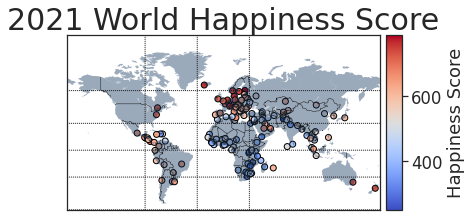

<Figure size 432x288 with 0 Axes>

In [ ]:
mapWorld(newdata, 2021)

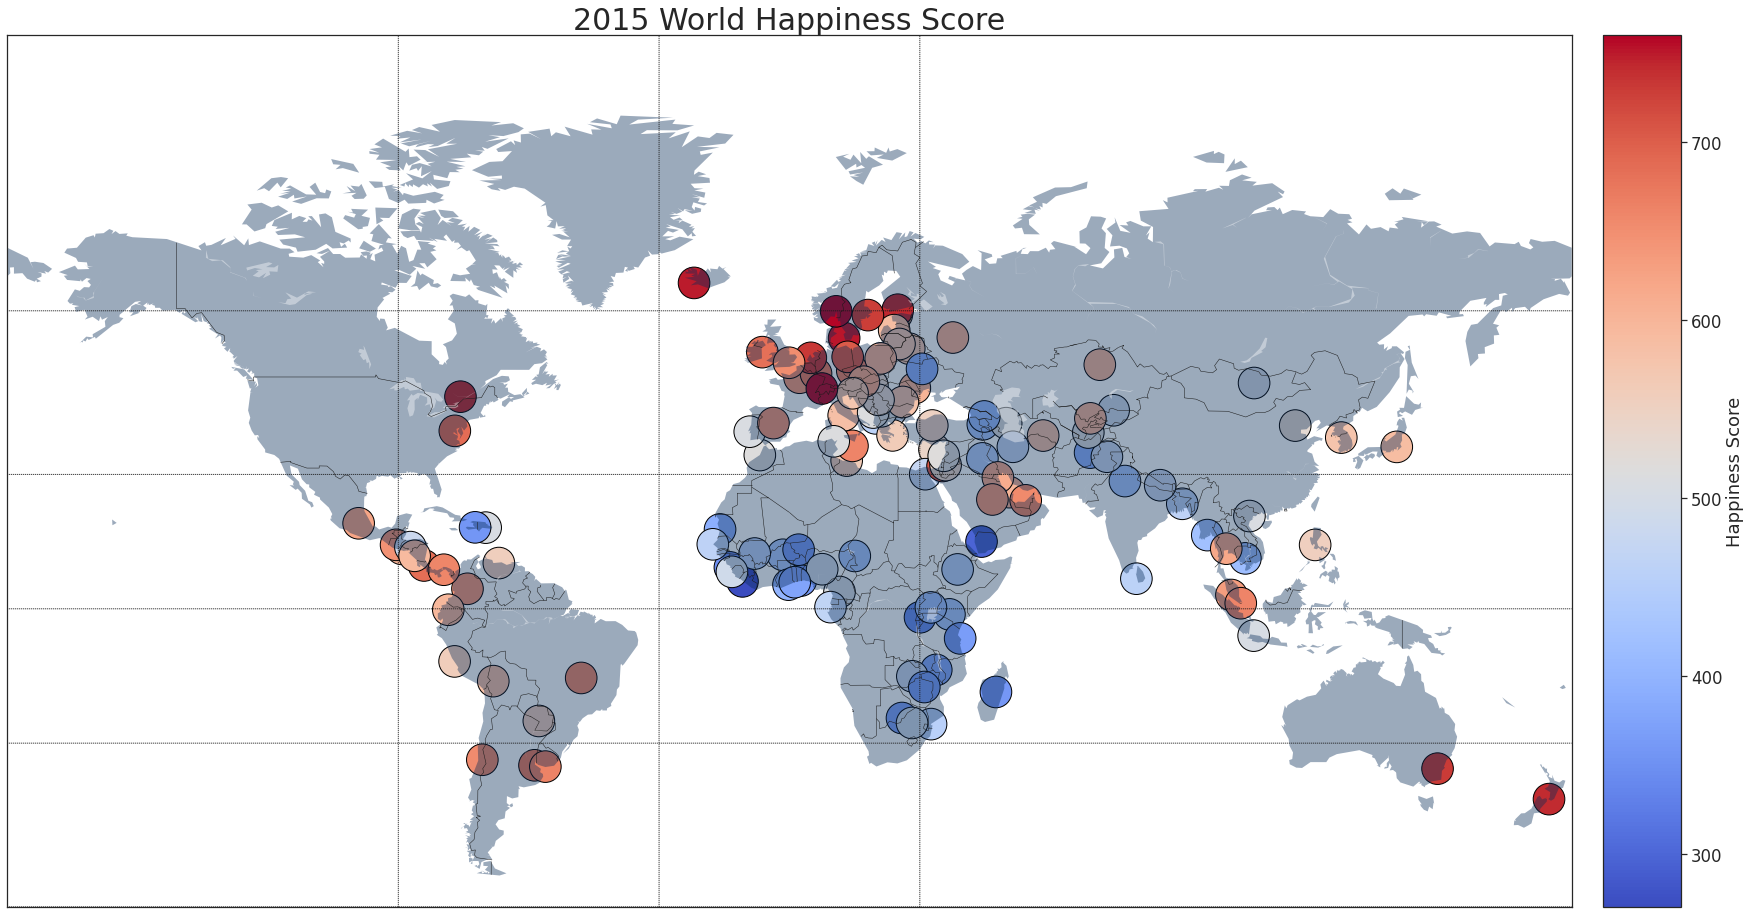

<Figure size 432x288 with 0 Axes>

In [ ]:
#map visualization

def mapWorld(data, year):

    datay = data[data['year'] == year]
    concap = pd.read_csv('country-capitals.csv') 
    concap.head()
    data_full = pd.merge(concap[['CountryName', 'CapitalName', 'CapitalLatitude', 'CapitalLongitude']], datay,left_on='CountryName',right_on='Country name')


    m = Basemap(projection='mill',llcrnrlat=-60,urcrnrlat=90,llcrnrlon=-180,urcrnrlon=180,resolution='c')
    #m.drawcoastlines()
    m.drawcountries()
    m.drawparallels(np.arange(-90,91.,30.))
    m.drawmeridians(np.arange(-90,90.,60.))
    
    #m.drawmapboundary(fill_color='#FFFFFF')
    lat = data_full['CapitalLatitude'].values.astype(np.float)
    lon = data_full['CapitalLongitude'].values.astype(np.float)
    a_1 = data_full['Ladder score'].values
    #a_2 = data_full['Logged GDP per capita'].values,s=100*a_2
    m.scatter(lon, lat, latlon=True,c=100*a_1,s=1000,linewidth=1,edgecolors='black',cmap='coolwarm', alpha=1)
    
    m.fillcontinents(color='#072B57',lake_color='#FFFFFF',alpha=0.4)
    cbar = m.colorbar()
    cbar.set_label('Happiness Score')
    #plt.clim(20000, 100000)
    plt.title(str(year)+" World Happiness Score", fontsize=30)
    plt.show()
    plt.savefig( str(year)+ ' World Happiness Score' +'.png')

sns.set(style="white",font_scale=1.5)
plt.figure(figsize=(30,30))
mapWorld(newdata,2015)



(14, 7)


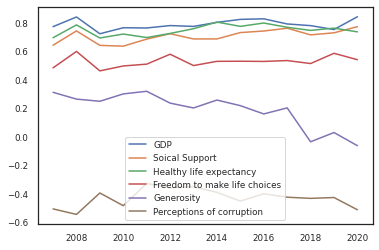

In [35]:
all_cor = []
col = ['Ladder score','Logged GDP per capita', 'Social support', 'Healthy life expectancy','Freedom to make life choices', 'Generosity',
        'Perceptions of corruption']
for year in range(2007,2021):
  datay = data[data['year'] == year]
  all_cor.append(datay[col].corr()['Ladder score'].values)

all_cor = np.array(all_cor)
print(all_cor.shape)

x = range(2007,2021)
plt.plot(x,all_cor[:,1],label = 'GDP')
plt.plot(x,all_cor[:,2],label = 'Soical Support')
plt.plot(x,all_cor[:,3],label = 'Healthy life expectancy')
plt.plot(x,all_cor[:,4],label = 'Freedom to make life choices')
plt.plot(x,all_cor[:,5],label = 'Generosity' )
plt.plot(x,all_cor[:,6],label = 'Perceptions of corruption' )
plt.legend()

                             Ladder score  ... Perceptions of corruption
Ladder score                   1.00(0.00)  ...               -0.42(0.09)
Logged GDP per capita         0.79(-0.05)  ...               -0.34(0.12)
Social support                0.76(-0.01)  ...               -0.20(0.09)
Healthy life expectancy        0.77(0.03)  ...               -0.36(0.04)
Freedom to make life choices   0.61(0.07)  ...               -0.40(0.03)
Generosity                    -0.02(0.04)  ...              -0.16(-0.11)
Perceptions of corruption     -0.42(0.09)  ...                1.00(0.00)

[7 rows x 7 columns]


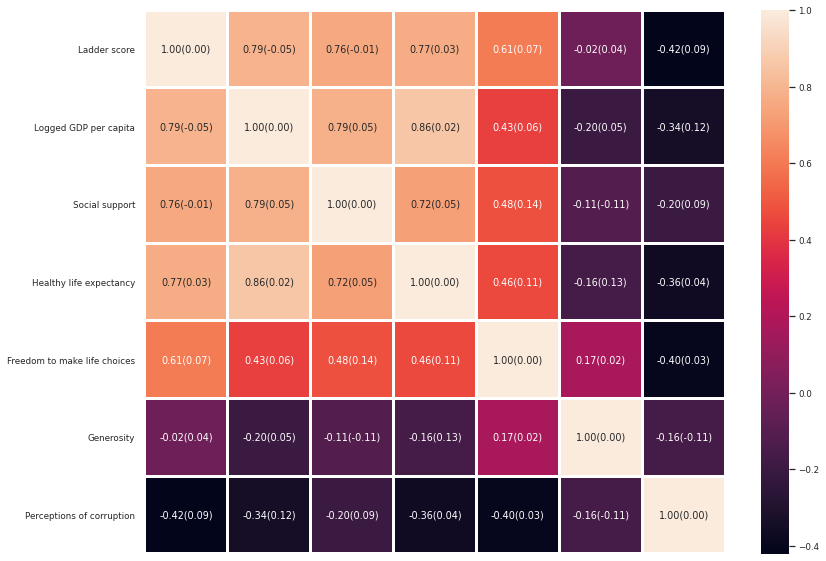

In [ ]:
  datay = data[data['year'] == 2021]
  datapre = data[data['year'] == 2020]
  #data21.to_csv('2021.csv', index=False) #index: Write row names (index).
  #datay.columns
  col = ['Ladder score','Logged GDP per capita', 'Social support', 'Healthy life expectancy','Freedom to make life choices', 'Generosity',
        'Perceptions of corruption']
  cor = datay[col].corr().round(2)
  corpre =  datapre[col].corr().round(2)
  cordiff = cor - corpre

  for i in col:
    for j in col:
      cor[i][j] = format('%1.2f(%1.2f)' %(cor[i][j],cordiff[i][j]))

  print(cor)


  fig = plt.figure(figsize=(13,10))
  sns.set(style="white",font_scale=0.8)
  sns.heatmap(datay[col].corr(),fmt='', annot=cor,xticklabels=False,linewidth=2)  
  fig.savefig('2021_cor_nume.png')


In [ ]:
#show an example of a specific year y, pairplot and numeric correlation and 2 factors corr 
def showyear(data,y='all'):
  #datay = data
  datay = data[data['year'] == y]
  #data21.to_csv('2021.csv', index=False) #index: Write row names (index).
  #datay.columns
  col = ['Ladder score','Logged GDP per capita', 'Social support', 'Healthy life expectancy','Freedom to make life choices', 'Generosity',
        'Perceptions of corruption']

  #pairplot
  #plt.figure(figsize=(18,18))
  sns.set(style="white",font_scale=1)
  f = sns.pairplot(datay[col])
  f.savefig(str(y)+'_cor_plot.png')
  #f.fig.suptitle('2021 World happiness report',y=1.08)
  
  #numeric correlation
  fig = plt.figure(figsize=(13,10))
  sns.set(style="white",font_scale=1.5)
  sns.heatmap(datay[col].corr(), fmt='.2f',annot=True,xticklabels=False,linewidth=2)  
  fig.savefig(str(y)+'_cor_nume.png')

  #fig.savefig(str(y)+'_cor_trip.png')

In [ ]:
showyear(data,2020)


In [ ]:
showyear(data,2020)


In [ ]:
#scatterline plot
datay = data
col = ['Ladder score','Logged GDP per capita', 'Social support', 'Healthy life expectancy','Freedom to make life choices', 'Generosity',
        'Perceptions of corruption']

#scatterline, 2 factors corr
#GDP skyblue, support orangered
vis = ['Ladder score','Logged GDP per capita', 'Healthy life expectancy']
fig = go.Figure()
print(datay.shape[0])
slected_c = random.choice(datay.shape[0], 50)
for s in slected_c:
    fig.add_trace(go.Scatter(
        x=[datay.iloc[s,:][vis[0]], datay.iloc[s,:][vis[0]]],
        y=[datay.iloc[s,:][vis[1]], datay.iloc[s,:][vis[2]]],
        mode="lines+text",
        text = [datay.iloc[s,:]['Country name']],
        textposition="bottom center"
    ))

    fig.add_trace(go.Scatter(
        x=[datay.iloc[s,:][vis[0]]],
        y=[datay.iloc[s,:][vis[1]]],
        name = 'GDP',
        mode="markers",
        marker_color= 'skyblue'
    ))

    fig.add_trace(go.Scatter(
        x=[ datay.iloc[s,:][vis[0]]],
        y=[ datay.iloc[s,:][vis[2]]],
        name = 'Social support',
        mode="markers",        
        marker_color= 'darkgreen'
    ))

    fig.update_layout(  
        showlegend=False,
    )
fig.show()

2098
